<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [125]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


In [126]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "3" #@param {type:"string"}
"""Student_ID&Name = "a" #@param {type:"string"}
Student_ID&Name = "b" #@param {type:"string"}
Student_ID&Name = "c" #@param {type:"string"}
Student_ID&Name = "d" #@param {type:"string"}
Student_ID&Name = "e" #@param {type:"string"}"""
#@markdown ---

'Student_ID&Name = "a" #@param {type:"string"}\nStudent_ID&Name = "b" #@param {type:"string"}\nStudent_ID&Name = "c" #@param {type:"string"}\nStudent_ID&Name = "d" #@param {type:"string"}\nStudent_ID&Name = "e" #@param {type:"string"}'

In [127]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Draft" #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [128]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [129]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


In [131]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [133]:
!pip install gpy

In [134]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [135]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Exploratory Data Analysis

### Train dataset

In [136]:
housePath = ''
is_COLAB = 'google.colab' in str(get_ipython())
if is_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    housePath = '/content/drive/MyDrive/Colab Notebooks/Data/house/'
else:
    housePath = './data/'

In [137]:
# file names
train_file_name = 'HousePrice_Train.csv'
test_file_name = 'HousePrice_Test.csv'

# training dataset: 
training_file = housePath + train_file_name

# test dataset: 
testing_file = housePath + test_file_name

In [138]:
# load train dataset
df_train = pd.read_csv(training_file)
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [139]:
# show first data frame rows 
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [140]:
# Generate descriptive statistics
df_train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


Reviewing the training dataset we can immediately see points of note which require inspection:  
- The maximum longitude of -1.7 degrees is outside of Ireland.
- The maximum number of beds and bathrooms, 27 and 18, are not likely to belong to houses.  
- The maximum surface area is over 400 times the size of the mean.

We remove the **id** and **index** columns before performing further inspection.

In [141]:
df_train.drop(['ID', 'Index'], axis=1, inplace=True)

We view categorical variables.

In [142]:
# Gathering categorical variables although not a guaranteed manner to do it given variables could be numerically encoded. 
numeric_attr = df_train._get_numeric_data().columns
all_attr = df_train.columns
categ_var = list(set(all_attr) - set(numeric_attr))
print(f"Categorical variables: {categ_var}")

Categorical variables: ['Features', 'Services', 'Description', 'Type', 'Location', 'BER_class']


In [143]:
# View detail of the categorical attributes without the text blocks Description and Features
categ_var.remove('Description')
categ_var.remove('Features')

In [144]:
for cat_var in categ_var:
    print(f"-- Attribute: {cat_var}:\n{df_train[cat_var].value_counts()}\n")

-- Attribute: Services:
Parking,Gas Fired Central Heating                                                               118
Parking                                                                                          77
Parking,Gas Fired Central Heating,Wired for Cable Television                                     74
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                               62
Parking,Gas Fired Central Heating,Alarm                                                          57
Parking,Wired for Cable Television                                                               35
Gas Fired Central Heating                                                                        25
Parking,Oil Fired Central Heating                                                                12
Parking,Alarm                                                                                    12
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchai

We look for missing data

In [145]:
# Check for number of missing values in original data prior to any transform
df_train.isna().sum()

Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [146]:
# Show percentage of missing values
df_train.isna().sum() * 100 / len(df_train)

Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

As **Services** is missing 64% of entries it is unlikely to be reliable in telling us much for our dataset. We will remove it. **BER_class** is missing 15% which we will replace with the mode.

In [147]:
df_train.drop(['Services'], axis=1, inplace=True)

BER_mode = df_train.BER_class.mode()[0]
df_train.BER_class.replace(0, BER_mode, inplace=True)

We look at boxplots for outliers:

In [148]:
def plot_multiple_boxplots(dataframe: pd.DataFrame=None, feature_list: list=None) -> None:
    """Plot multiple boxplots for features in a list
    
    Args:
        dataframe: DataFrame from which to pull features provided in feature_list
        feature_list: list, contains string names of features to plot
    Returns:
        None
    """
    fig, axes = plt.subplots(1, len(feature_list))
    for i, col in enumerate(feature_list):
        ax = sns.boxplot(y=dataframe[col], ax=axes.flatten()[i])
        ax.set_ylim(dataframe[col].min(), dataframe[col].max())
        ax.set_ylabel(col)
    fig.set_size_inches(16, 4)
    plt.show()

Numeric variables: Index(['Num_Bathrooms', 'Num_Beds', 'Latitude', 'Longitude', 'Surface',
       'Price'],
      dtype='object')


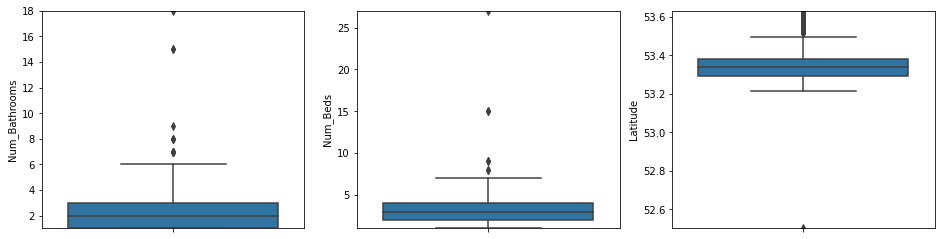

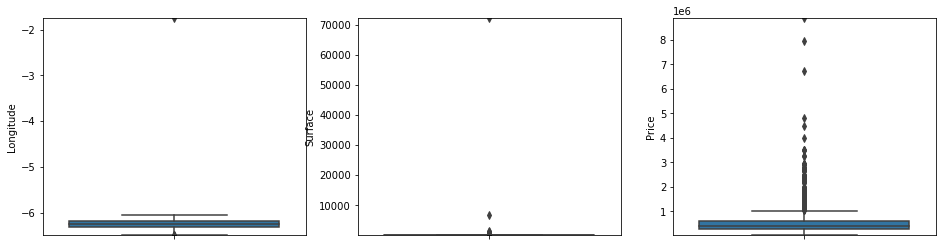

In [149]:
# Select numeric datatypes\
numeric_attr = df_train.select_dtypes(np.number).columns
print(f"Numeric variables: {numeric_attr}")

plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We observe that there are very large outliers in **surface**, **Num_Bathrooms**, **Num_Beds** and **Price**.
We'll revivew each in turn. 

In [150]:
df_train.loc[df_train.Num_Bathrooms>12]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
557,Inchicore,15,15,D1,umber 67 &amp; 69 Jamestown Road represent a f...,18 separate units\nTransport links including t...,53.335109,-6.331515,semi-detached,318.2,775000
1099,Dun Laoghaire,15,15,NaN,A truly unique stone built house of great qual...,Lift servicing all floors\nVenetian and gothic...,53.287504,-6.146605,detached,700.0,1500000
1378,Killiney,18,27,NaN,The Grove is an imposing Victorian mansion bui...,Approx. 1 490 sq. m / 16 041 sq. ft. of accomm...,53.260955,-6.117266,detached,1490.0,4500000


The buildings with more than 12 bathrooms are the outliers in terms of bedrooms but are not the largest outliers in terms of price or surface. It is possible we could drop these without adversely affecting the model.

In [151]:
df_train.drop(df_train.loc[df_train.Num_Bathrooms>12].index, inplace=True)

In [152]:
df_train.loc[df_train.Longitude>-4]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
355,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,None,52.501856,-1.744995,semi-detached,79.0,199000


The property with the longitudinal outlier is also an outlier in latitude. The lat/long equates to Birmingham depiste being listed as Clondalkin. We will drop this outlier.

In [153]:
df_train.drop(df_train.loc[df_train.Longitude>-4].index, inplace=True)

In [158]:
df_train.loc[df_train.Surface>50000]

,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price
506,Swords,1,4,E1,Thornton Park is a superb modern equestrian ce...,None,53.474502,-6.343483,bungalow,72236.38714,1100000


The **Description** indicates that this is actually an equestrian centre which explains why the surface area is an outlier. We will drop this property.

In [159]:
df_train.drop(df_train.loc[df_train.Surface>50000].index, inplace=True)

In [160]:
df_train.describe()

,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,2.030006,3.013472,53.351019,-6.257897,124.240093,5.514738e+05
std,1.087341,1.175137,0.073910,0.091787,186.218564,5.568198e+05
min,1.000000,1.000000,53.215381,-6.497000,3.400000,1.999500e+04
25%,1.000000,2.000000,53.294461,-6.309532,73.000000,2.950000e+05
50%,2.000000,3.000000,53.341667,-6.247821,97.000000,3.950000e+05
75%,3.000000,4.000000,53.382053,-6.194453,135.000000,5.950000e+05
max,9.000000,9.000000,53.630588,-6.054719,6705.000000,8.900000e+06


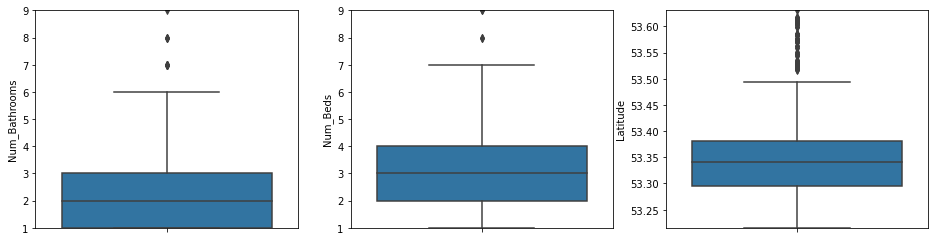

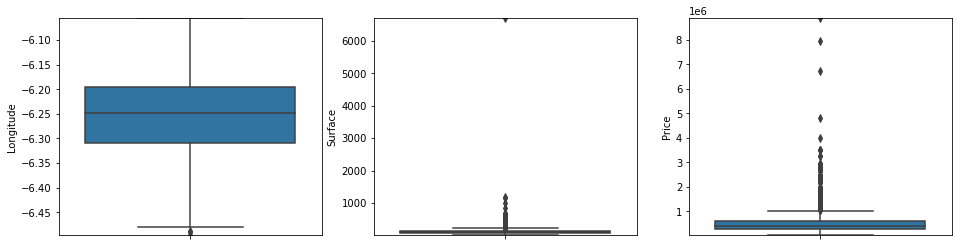

In [161]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

We'll scale the numeric features.

array([[<AxesSubplot:title={'center':'Num_Bathrooms'}>,
        <AxesSubplot:title={'center':'Num_Beds'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Surface'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

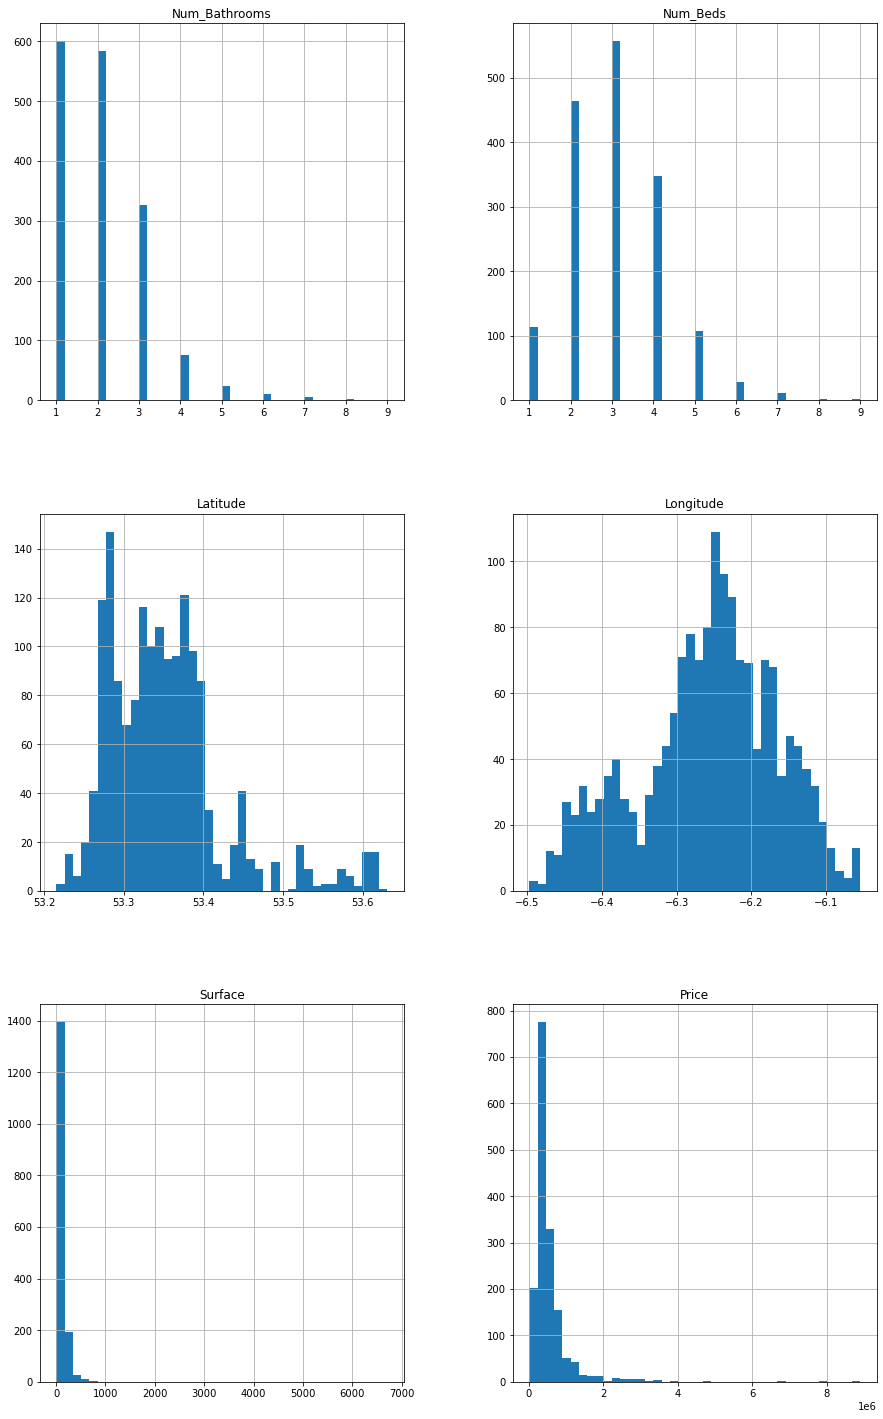

In [165]:
df_train[numeric_attr].hist(bins=40, figsize=[15,25])

**Num_Bathrooms**, **Num_Beds** and **Surface** are skewed. We'll use log transformation these and check if they are less skewed in this representation.

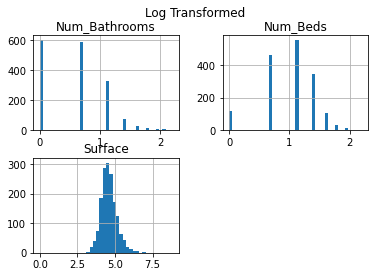

In [167]:
lst = ['Num_Bathrooms', 'Num_Beds', 'Surface']
for var in lst:
    var_min = df_train[var].min()
    df_train[var] = np.log(df_train[var]-var_min+1.0)

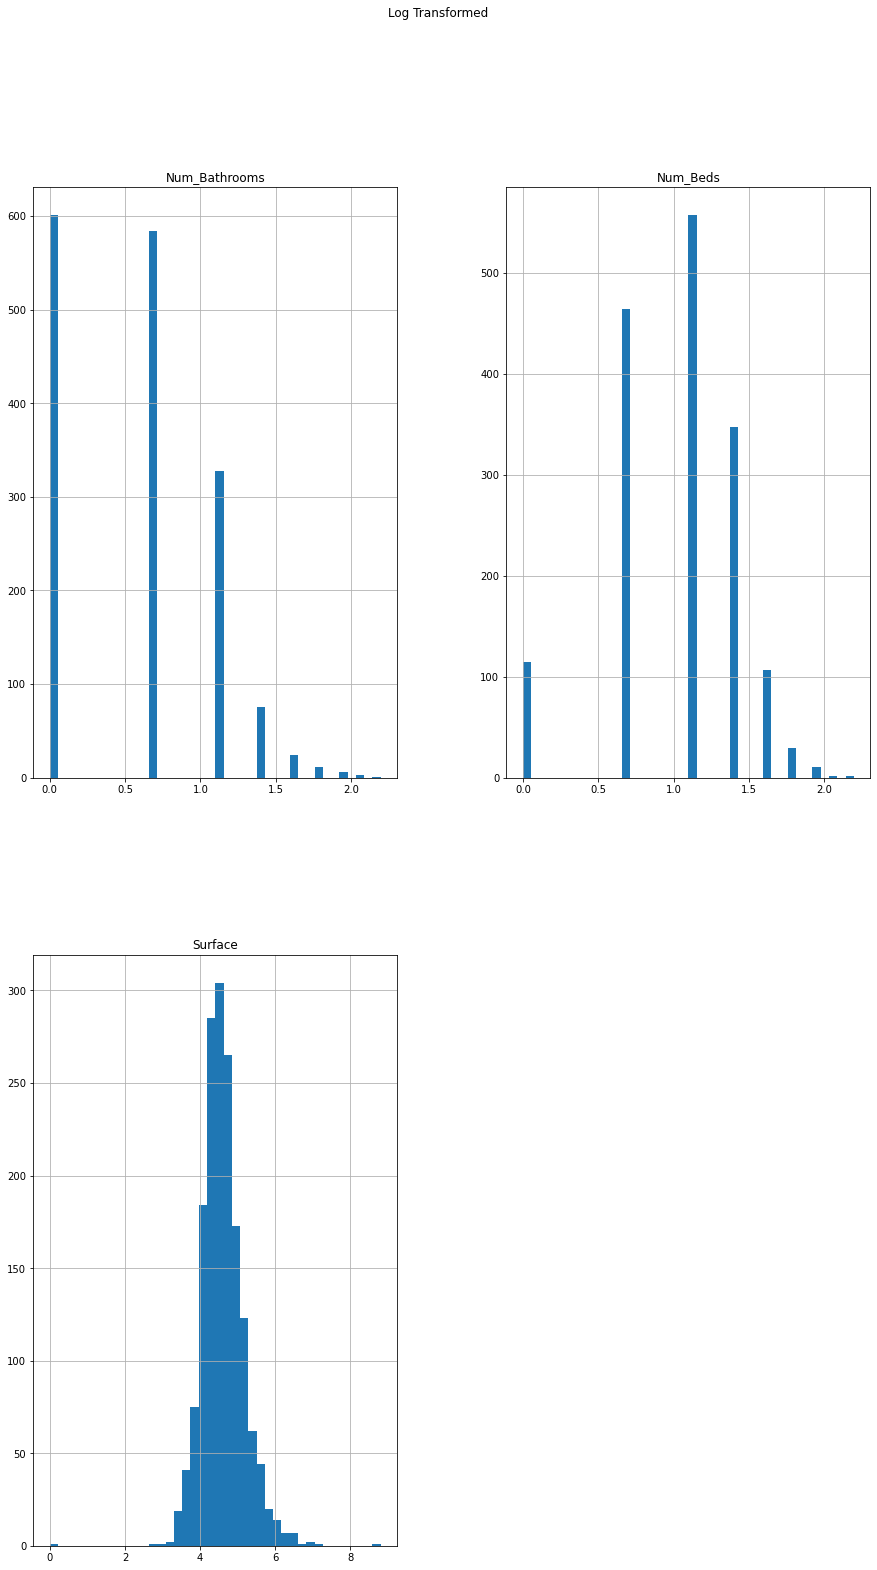

In [168]:
df_train[lst].hist(bins=40, figsize=[15,25])
plt.suptitle('Log Transformed')
plt.show()

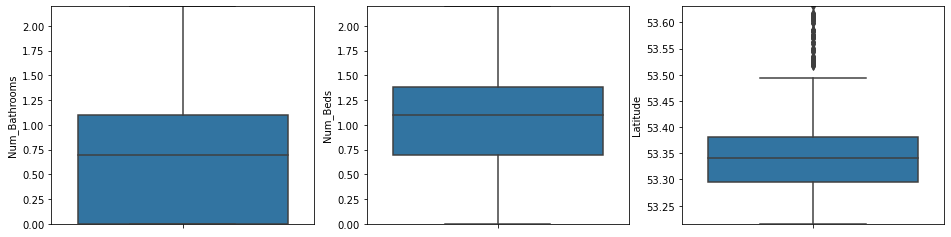

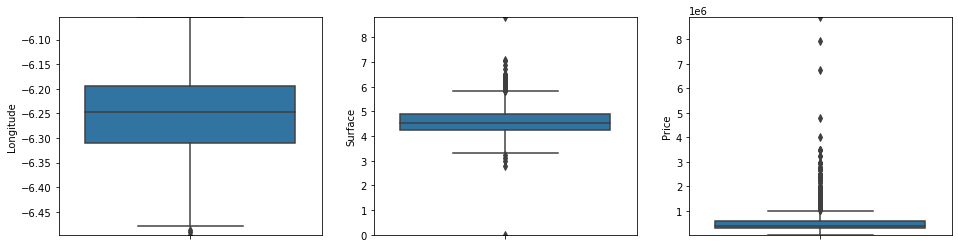

In [169]:
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[:3])
plot_multiple_boxplots(dataframe=df_train, feature_list=numeric_attr[3:])

Following log transformation **Num_Bathrooms**, **Num_Beds** and **Surface** look less skewed.


We now look for correlations between our response variable **price** and possible explanatory variables using a heatmap of our reduced dataset.

<AxesSubplot:>

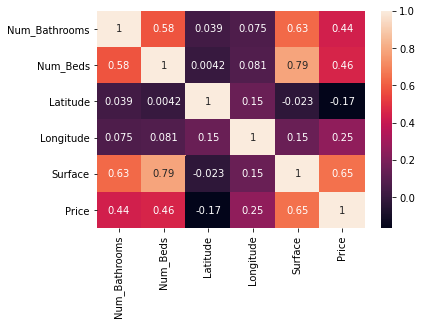

In [172]:
sns.heatmap(df_train.corr(), annot = True)

### Test dataset

In [ ]:
# show first data frame rows 
dftest.head()

In [ ]:
# Generate descriptive statistics
dftest.describe()

### Expected Cost dataset

In [ ]:
# Generate descriptive statistics
dfcost.describe()

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

In [ ]:
def generate_bayesian_lin_reg_model(
    alpha: dict={'mu':0, 'sigma':30},
    beta: dict={'mu':0, 'sigma':30},
    sigma: dict={'beta':5},
    iteration_cnt: int=40000,
    sample_cnt: int=5000,
    X: np.ndarray=None,
    y: np.ndarray=None
    ):
    """Generate a Bayesian linear regression model
    
    alpha, beta defined as normal distributions
    sigma defined as HalfCauchy distribution
    
    Args:
        alpha: dict containing mu and sigma values for alpha normal distribution
        beta: dict containing mu and sigma values for beta normal distribution
        sigma: dict containing sigma value for sigma HalfCauchy distribution
        iteration_cnt: int iteration count for bayesian linear reg. model fit
        sample_cnt: int sample count drawn from posterior
        X: np.ndarray of training data
        y: np.ndarray of labels

    Returns:
        Approximation for the model
        Posterior for the bayesian linear regression model
    """
    with pm.Model() as model:
        # prior over the parameters of linear regression
        _alpha = pm.Normal('alpha', mu=alpha['mu'], sigma=alpha['sigma'])
        # we have a beta for each column of Xn
        _beta = pm.Normal('beta', mu=beta['mu'], sigma=beta['sigma'], shape=X.shape[1])
        # prior over the variance of the noise
        _sigma = pm.HalfCauchy('sigma_n', beta=sigma['beta'])
        # linear regression relationship
        #linear regression model in matrix form
        _mu = _alpha + pm.math.dot(_beta, X.T)
        # likelihood 
        like = pm.Normal('like', mu=_mu, sigma=_sigma, observed=y[:,0])
  
    with model:
        # iterations of the algorithm
        approximation = pm.fit(iteration_cnt, method='advi')

    # samples from the posterior    
    posterior = approximation.sample(sample_cnt)
    return posterior, approximation

In [ ]:
def blr(
    posterior,
    yscaler,
    test,
    ):
    """Calculate BLR value
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        yscaler: StandardScaler
        test: np.ndarray, test data

    Return:
        BLR value
    """
    y_pred_blr = np.exp(yscaler.inverse_transform(np.mean(posterior['alpha']) 
              + np.dot(np.mean(posterior['beta'],axis=0), test.T)))
    return y_pred_blr

def mae(
    y_pred_blr,
    y_test
    ):
    """Calculate MAE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAE value
    """
    mae = np.mean(abs(y_pred_blr - y_test))
    return mae

def mape(
    y_pred_blr,
    y_test
    ):
    """Calculate MAPE value
    
    Args:
        y_pred_blr: blr value
        y_test: y values of test set
    Return:
        MAPE value
    """
    mape = np.mean(abs(y_pred_blr - y_test) / y_test)
    return mape

In [ ]:
def model_predict(
    posterior,
    X,
    nsamples,
    yscaler
    ):
    """Generate model predictions
    
    Args:
        posterior: pymc3 MultiTrace, sampled data from posterior belief
        X: np.ndarray, training data
        nsamples: int, number of samples to select from posterior
        yscaler: StandardScaler
    Return:
        Preditions
    """
    Ypred = yscaler.inverse_transform(ppc(posterior['alpha'], posterior['beta'], posterior['sigma_n'],
                                          X, nsamples=nsamples))
    return Ypred
    
def plot_model_pred_vs_observations(
    predictions=None,
    log_labels=None,
    title=None
    ):
    """Plot the model predictions against the actual observations
    
    Args:
        predictions: np.ndarray, model predictions
        log_labels: np.ndarray, log of y labels
    Return:
        None
    
    """
    for i in range(predictions.shape[0]):
        az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2})
    az.plot_dist(predictions[i,:], color='r', plot_kwargs={"linewidth": 0.2}, label="prediction")
    az.plot_dist(log_labels, label='true observations');
    plt.legend()
    plt.xlabel("log(y) - output variable")
    plt.ylabel("density plot")
    plt.title(title, fontsize=20)

In [ ]:
def prep_cluster_data(
    train_data: np.ndarray=None,
    test_data: np.ndarray=None,
    label_data: np.ndarray=None,
    clusters_train_labels: np.ndarray=None,
    clusters_test_labels: np.ndarray=None,
    idx: int=0
    ):
    """Return cluster specific training and test data from all clustered data.
       The training data has already been clustered and we wish to separate it
       into training data specific to a single cluster as defined by 'idx'
    
    Args:
        train_data: np.ndarray containing all clustered training data
        test_data: np.ndarray containing all clustered test data
        label_data: np.ndarray containing all label data
        clusters_train_labels: np.ndarray containing all cluster train labels (data belonging to which cluster)
        clusters_test_labels: np.ndarray containing all cluster tsst labels (data belonging to which cluster)
        idx: int index of which cluster to return
    Returns:
        np.ndarray: cluster specific training data
        np.ndarray: cluster specific test data
        np.ndarray: log of label data specific to cluster
        StandardScaler: scaler for label data
        np.ndarray: transformed log of label data
    """
    Xn = train_data[clusters_train_labels==idx,:]
    Xtestn = test_data[clusters_test_labels==idx,:]
    ylog = np.log(label_data.astype('float')[clusters_train_labels==idx,:])
    yscaler = StandardScaler().fit(ylog)
    yn = yscaler.transform(ylog)
    
    return Xn, Xtestn, ylog, yscaler, yn

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

# SUMMARY

Your summary here.